In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [104]:
df = pd.read_csv('./../data/merged_data.csv')

In [105]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,...,27142.451857,26395.847330,19736.054484,9543.760350,223.790644,15057.239225,17365.139937,13473.701138,10014.440951,4391.736785
std,18.764856,624.817403,648.030094,2.385172,21.887316,2.001541,19.292389,71.256850,4.679056e+10,1.482439e+06,...,39941.977062,36960.317249,24219.922727,9600.950081,399.065330,22371.870231,24534.250632,16564.421275,11715.352615,4832.596737
min,20191.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135000e+03,2.000000e+00,...,1169.000000,1978.000000,2704.000000,2245.000000,0.000000,635.000000,1180.000000,1674.000000,1663.000000,257.000000
25%,20203.000000,94.000000,105.000000,1.300000,2.000000,1.200000,2.000000,0.000000,1.197476e+09,1.463000e+04,...,5590.000000,5799.000000,5397.000000,3928.000000,0.000000,3138.000000,3795.000000,4042.000000,3856.000000,1695.000000
50%,20221.000000,161.000000,188.000000,2.600000,5.000000,2.300000,4.000000,4.000000,4.114511e+09,7.159500e+04,...,9123.000000,10094.000000,10122.000000,5924.000000,39.000000,5068.000000,6673.000000,6807.000000,5695.000000,2678.000000
75%,20234.000000,313.000000,357.000000,4.200000,12.000000,3.600000,10.000000,27.000000,1.251953e+10,3.641125e+05,...,24849.000000,24451.000000,18373.000000,10207.000000,209.000000,21296.000000,21114.000000,14062.000000,8866.000000,4775.000000
max,20252.000000,17827.000000,17845.000000,43.600000,773.000000,33.300000,554.000000,688.000000,1.399137e+12,2.716973e+07,...,204697.000000,188865.000000,116356.000000,51339.000000,1679.000000,114671.000000,124729.000000,86333.000000,63848.000000,26816.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Columns: 137 entries, 기준_년분기_코드 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(132), int64(2), object(3)
memory usage: 41.8+ MB


In [107]:
df = df.drop(['폐업_점포_수', '폐업_영업_개월_평균', '서울시_폐업_영업_개월_평균'], axis=1)

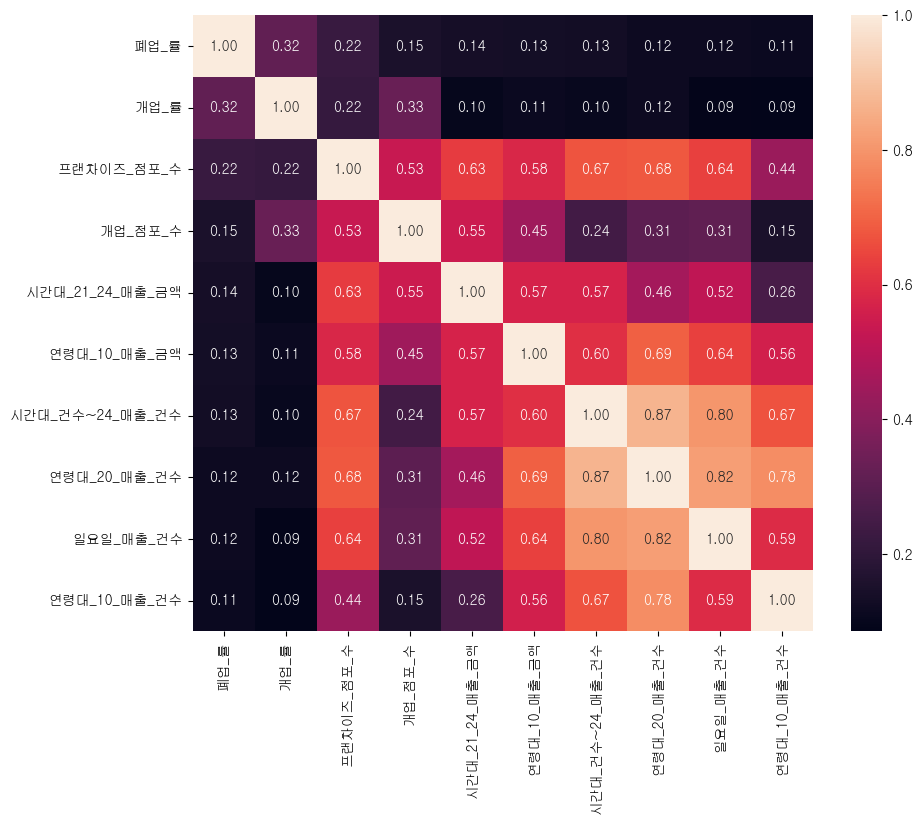

In [108]:
corr = df.corr(numeric_only=True)

# 폐업률과의 상관관계 절댓값 기준으로 정렬
target_corr = corr['폐업_률'].dropna()
top_features = target_corr.abs().sort_values(ascending=False).head(10).index

corr_subset = corr.loc[top_features, top_features]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f")
plt.show()

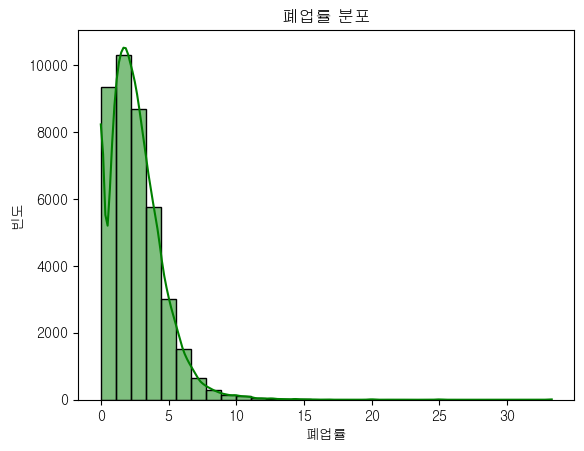

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['폐업_률'], bins=30, kde=True, color='green')
plt.title('폐업률 분포')
plt.xlabel('폐업률')
plt.ylabel('빈도')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9132\245921855.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




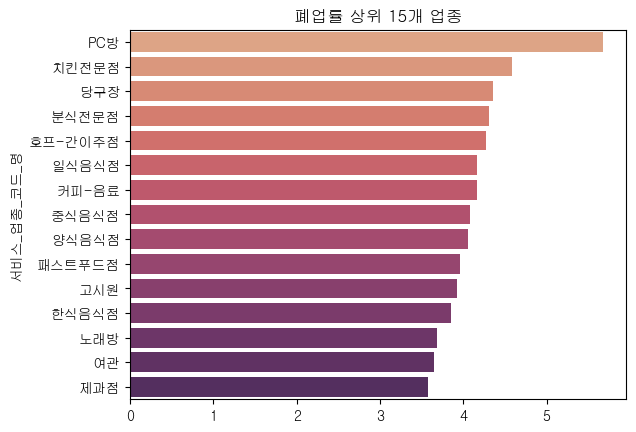

In [110]:
service_mean = df.groupby('서비스_업종_코드_명')['폐업_률'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=service_mean.values, y=service_mean.index, palette='flare')
plt.title('폐업률 상위 15개 업종')
plt.show()

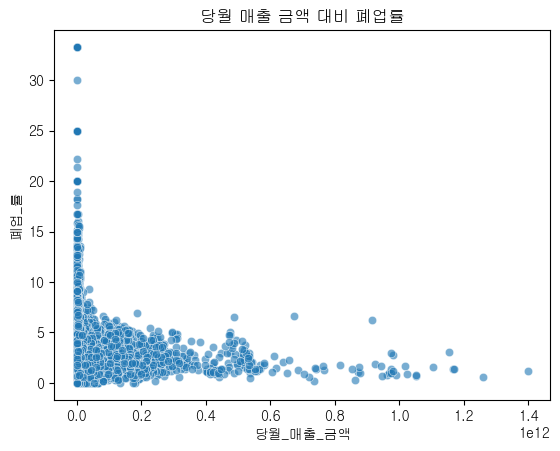

In [111]:
sns.scatterplot(x='당월_매출_금액', y='폐업_률', data=df, alpha=0.6)
plt.title(f'당월 매출 금액 대비 폐업률')
plt.show()

In [112]:
df['폐업률_등급'] = pd.qcut(df['폐업_률'], q=[0, 0.75, 1.0], labels=[0, 1])

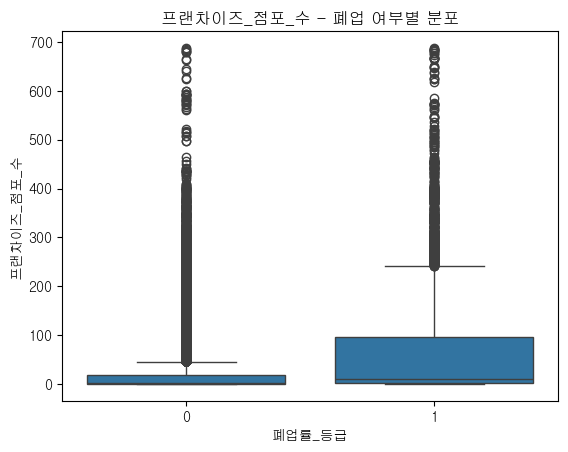

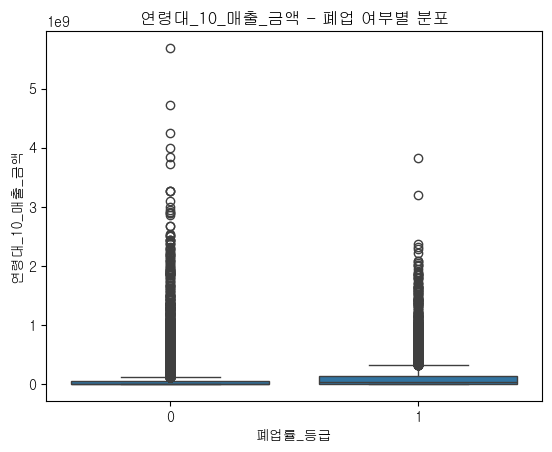

In [113]:
num_cols = ['프랜차이즈_점포_수', '연령대_10_매출_금액']
for col in num_cols:
    sns.boxplot(x='폐업률_등급', y=col, data=df)
    plt.title(f'{col} - 폐업 여부별 분포')
    plt.show()